<a href="https://colab.research.google.com/github/Rushmila24222/Dendrogram/blob/main/Dendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y graphviz graphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 30 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [ ]:
!pip install pygraphviz --no-binary :all:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 713.9 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169717 sha256=e330b0b6fb255d03813f1fef55a2042f9279dde0fb54ccc037b7ba068b704b0d
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


In [ ]:
import pandas as pd
import numpy as np
import math
import string
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
clusters = []

In [ ]:
new_obj_list = list(string.ascii_uppercase)
new_obj_list

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
cluster_merge_steps = []

Calculating the eucledian distance

In [ ]:
def calculate_edistance(df):
  row_list = df.to_numpy().tolist()
  distance = []
  distance_list = []
  #return row_list
  for i in range(len(row_list)):
    for j in range((i+1)):
      e_distance = math.sqrt((row_list[i][1] - row_list[j][1])**2 + (row_list[i][2] - row_list[j][2])**2)
      distance.append(round(e_distance,1))
    distance_list.append(distance)
    distance = []
  return distance_list



distance matrix

In [ ]:
def create_df(distance_list, obj):
  df_distance = pd.DataFrame(distance_list, index=obj, columns=obj)
  return df_distance

Calculating the shortest distance

In [ ]:
def shortest_distance(df):
  np.fill_diagonal(df.values, np.nan)
  return df.min().min()


Identifying the two closest points

In [ ]:
def get_index_and_column(df, value):
  result = []
  for col in df.columns:
      for index in df.index:
          if df.at[index, col] == value:
              result.append(col)
              result.append(index)
              if result not in clusters:
                    clusters.append(result)
                    return result


  return None

Merging the points into a new cluster

In [ ]:
def new_cluster(df, objects):
  new_index = df[df[''] == objects[0]].index[0]
  print(new_index)
  a1_new = df[df[''].isin(objects)]["a1"].mean()
  a2_new = df[df[''].isin(objects)]["a2"].mean()

  new_row = [new_obj_list[0], a1_new, a2_new]
  new_obj_list.pop(0)
  for obj in objects:
    idx = df[df[''] == obj].index
    df = df.drop(idx[0], axis=0)
  df = pd.concat([df, pd.DataFrame([new_row], columns=df.columns, index=[new_index])])
  df = df.sort_index()
  df = df.reset_index(drop=True)
  return df

Dataframe

In [ ]:
obj = ["R1", "R2", "R3", "R4", "R5"]
a1 = [1, 2, 4, 7, 5]
a2 = [1, 1, 5, 7, 7]
df = pd.DataFrame(list(zip(obj, a1, a2)), columns=["", "a1", "a2"])
df

,,a1,a2
0,R1,1,1
1,R2,2,1
2,R3,4,5
3,R4,7,7
4,R5,5,7


In [ ]:
while len(df) > 1:
    distance_list = calculate_edistance(df)
    print(distance_list)
    df_distance = create_df(distance_list, df[""].tolist())
    print(df_distance)
    min_val = shortest_distance(df_distance)
    print(min_val)
    objects = get_index_and_column(df_distance, min_val)
    cluster_merge_steps.append([objects[0], objects[1], min_val,new_obj_list[0]])
    print(objects)
    if objects:
        df = new_cluster(df, objects)
        print(df)


[[0.0], [1.0, 0.0], [5.0, 4.5, 0.0], [8.5, 7.8, 3.6, 0.0], [7.2, 6.7, 2.2, 2.0, 0.0]]
     R1   R2   R3   R4   R5
R1  0.0  NaN  NaN  NaN  NaN
R2  1.0  0.0  NaN  NaN  NaN
R3  5.0  4.5  0.0  NaN  NaN
R4  8.5  7.8  3.6  0.0  NaN
R5  7.2  6.7  2.2  2.0  0.0
1.0
['R1', 'R2']
0
        a1   a2
0   A  1.5  1.0
1  R3  4.0  5.0
2  R4  7.0  7.0
3  R5  5.0  7.0
[[0.0], [4.7, 0.0], [8.1, 3.6, 0.0], [6.9, 2.2, 2.0, 0.0]]
      A   R3   R4   R5
A   0.0  NaN  NaN  NaN
R3  4.7  0.0  NaN  NaN
R4  8.1  3.6  0.0  NaN
R5  6.9  2.2  2.0  0.0
2.0
['R4', 'R5']
2
        a1   a2
0   A  1.5  1.0
1  R3  4.0  5.0
2   B  6.0  7.0
[[0.0], [4.7, 0.0], [7.5, 2.8, 0.0]]
      A   R3    B
A   0.0  NaN  NaN
R3  4.7  0.0  NaN
B   7.5  2.8  0.0
2.8
['R3', 'B']
1
       a1   a2
0  A  1.5  1.0
1  C  5.0  6.0
[[0.0], [6.1, 0.0]]
     A    C
A  0.0  NaN
C  6.1  0.0
6.1
['A', 'C']
0
        a1   a2
0  D  3.25  3.5


In [ ]:
clusters

[['R1', 'R2'], ['R4', 'R5'], ['R3', 'B'], ['A', 'C']]

In [ ]:
cluster_df = pd.DataFrame(cluster_merge_steps, columns=["Cluster 1", "Cluster 2", "Distance", "New Cluster Label"])
cluster_df

,Cluster 1,Cluster 2,Distance,New Cluster Label
0,R1,R2,1.0,A
1,R4,R5,2.0,B
2,R3,B,2.8,C
3,A,C,6.1,D


<ipython-input-16-3e815301a7d6>:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


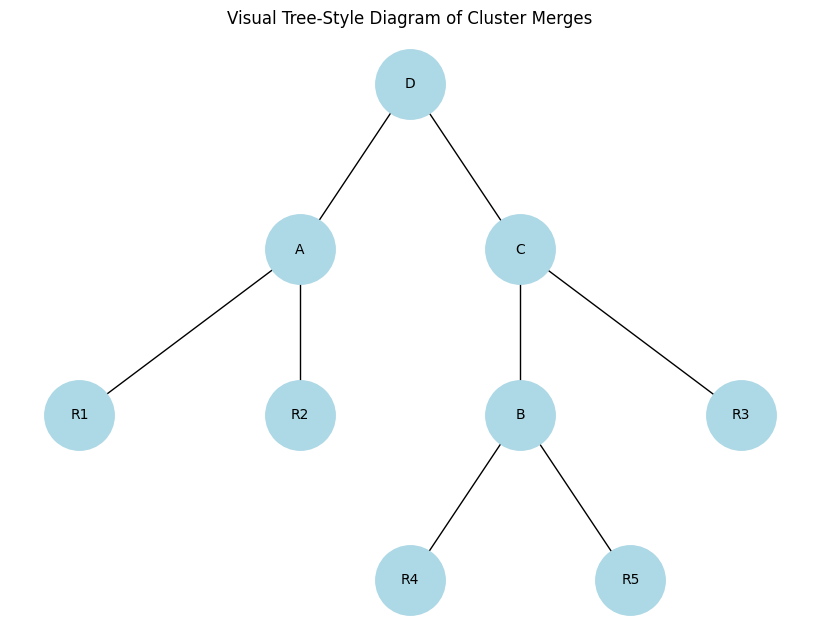

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add merge steps as edges
for c1, c2, _, new_label in cluster_merge_steps:
    G.add_edge(new_label, c1)
    G.add_edge(new_label, c2)

# Position the nodes using hierarchy layout
pos = graphviz_layout(G, prog="dot")

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=False, node_size=2500, node_color='lightblue', font_size=10)
plt.title("Visual Tree-Style Diagram of Cluster Merges")
plt.tight_layout()
plt.show()


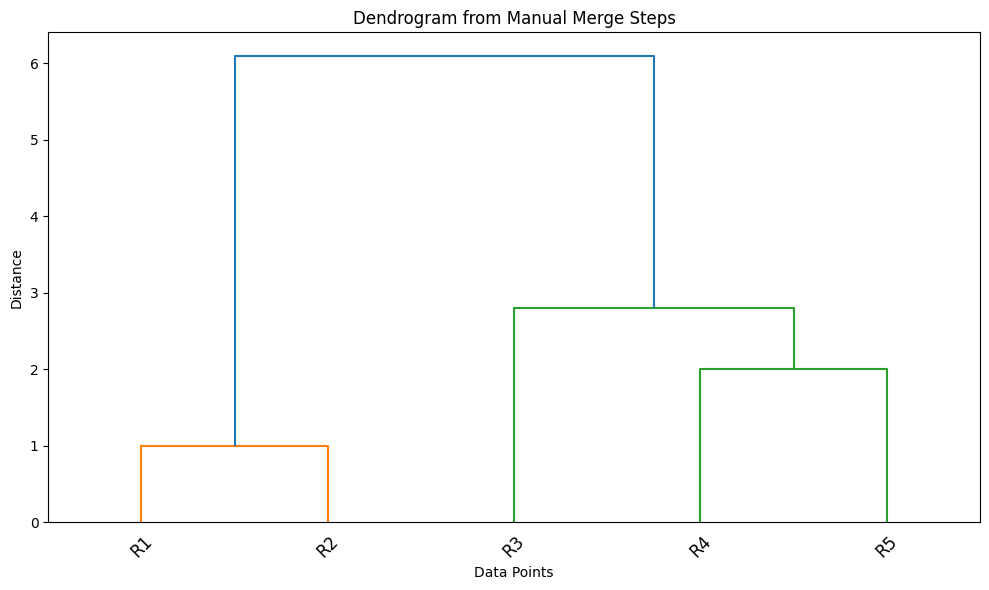

In [ ]:
initial_labels = obj.copy()
label_to_index = {label: idx for idx, label in enumerate(initial_labels)}
current_index = len(initial_labels)
Z_manual = []

# Step 2: Build the linkage matrix
for c1, c2, dist, new_label in cluster_merge_steps:
    i = label_to_index[c1]
    j = label_to_index[c2]

    # Determine how many samples are in each cluster
    def get_sample_count(label):
        for row in Z_manual:
            if row[0] == label_to_index[label] or row[1] == label_to_index[label]:
                return row[3]
        return 1

    n1 = get_sample_count(c1)
    n2 = get_sample_count(c2)
    total = n1 + n2

    # Append the linkage row
    Z_manual.append([i, j, dist, total])

    # Map new cluster label to next index
    label_to_index[new_label] = current_index
    current_index += 1

# Convert to numpy array
Z_manual = np.array(Z_manual)

# Step 3: Plot the dendrogram using the manual linkage matrix
plt.figure(figsize=(10, 6))
dendrogram(Z_manual, labels=obj, leaf_rotation=45, leaf_font_size=12)
plt.title("Dendrogram from Manual Merge Steps")
plt.xlabel("Data Points")
plt.ylabel("Distance")
#plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# distance_list = calculate_edistance(df)
# distance_list

In [ ]:
# df_distance = create_df(distance_list, obj)
# df_distance

In [ ]:
# min_val = shortest_distance(df_distance)
# min_val

In [ ]:
# objects = get_index_and_column(df_distance, min_val)
# objects

In [ ]:
# clusters

In [ ]:
# df = new_cluster(df, objects)
# df